In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopy.distance
import os
import plotly.graph_objects as go
from shapely.geometry import shape, Point
import seaborn as sns
import matplotlib as mpl
import folium
import re
import seaborn as sns
from datetime import datetime
import pytz
from pytz import timezone

In [18]:
df = pd.read_csv('Session-Details-Summary-20240119-3.csv') 


In [19]:
unique_values_time_zone = df['Start Time Zone'].unique()
print(unique_values_time_zone)

['EST' 'CST' 'PST' 'CDT' 'EDT' 'PDT']


In [20]:
# Convert Start and End Date to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

def convert_to_est(row, date_col, tz_col):
    tz_map = {'EST': 'America/New_York', 'CST': 'America/Chicago', 'CDT': 'America/Chicago', 'EDT': 'America/New_York', 'PDT': 'America/Los_Angeles', 'PST': 'America/Los_Angeles'}
    return row[date_col].tz_localize(tz=tz_map[row[tz_col]], ambiguous='NaT').tz_convert(tz='EST')


# Apply function to Start and End Date
df['Start_Time_EST'] = df.apply(convert_to_est, args=('Start Date', 'Start Time Zone'), axis=1)
df['End_Time_EST'] = df.apply(convert_to_est, args=('End Date', 'End Time Zone'), axis=1)

In [21]:
missing_count = df['Port Type'].value_counts().get('Missing', 0)
print(f"Number of missing values in 'Port Type': {missing_count}")

#df['Port Type'] = df['Port Type'].fillna('Missing')

Number of missing values in 'Port Type': 0


In [22]:
df=df.dropna(subset=["Port Type"])

### Add weekdawys or weekend column 

In [23]:
# Convert 'Start_Time_EST' to datetime if it's not already
df['Start_Time_EST'] = pd.to_datetime(df['Start_Time_EST'])

# Create a new column 'Day_of_Week' that represents the day of the week
df['Day_of_Week'] = df['Start_Time_EST'].dt.dayofweek

# Create new columns 'Is_Weekday' and 'Is_Weekend'
df['Is_Weekday'] = df['Day_of_Week'].isin([0, 1, 2, 3, 4]).astype(int)
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

# ML, L2, DC  Dataframe

In [8]:
# Define the columns you want to keep
columns = ['Station Name', 'MAC Address', 'Org Name', 'Address 1', 'City', 'State/Province', 
           'Zip/Postal Code', 'Driver Zip/Postal Code', 'User ID', 'Latitude', 'Longitude', 'Port Type', 
           'Start_Time_EST', 'End_Time_EST', 'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 
           'Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Fee', 'Start SOC', 'End SOC', 
           'System S/N', 'Model Number', 'Vehicle MAC ID']

# Create a new DataFrame for ML
df_ml = df[columns]

In [9]:
# Save df_ml to an Excel file
#df_ml.to_excel('df_ml.xlsx', index=False)


In [10]:
df_L2 = df[(df['Port Type'].str.fullmatch('Level 2'))]

df_DC = df[(df['Port Type'].str.fullmatch('DC Fast'))]

### Add weekday or weekend 

In [11]:
# Convert 'Start_Time_EST' to datetime if it's not already
df_ml['Start_Time_EST'] = pd.to_datetime(df_ml['Start_Time_EST'])

# Create a new column 'Day_of_Week' that represents the day of the week
df_ml['Day_of_Week'] = df_ml['Start_Time_EST'].dt.dayofweek

# Create new columns 'Is_Weekday' and 'Is_Weekend'
df_ml['Is_Weekday'] = df_ml['Day_of_Week'].isin([0, 1, 2, 3, 4]).astype(int)
df_ml['Is_Weekend'] = df_ml['Day_of_Week'].isin([5, 6]).astype(int)


C:\Users\mehdi\AppData\Local\Temp\ipykernel_32988\3044458901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Start_Time_EST'] = pd.to_datetime(df_ml['Start_Time_EST'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_32988\3044458901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Day_of_Week'] = df_ml['Start_Time_EST'].dt.dayofweek
C:\Users\mehdi\AppData\Local\Temp\ipykernel_32988\3044458901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [12]:
df_ml

,Station Name,MAC Address,Org Name,Address 1,City,State/Province,Zip/Postal Code,Driver Zip/Postal Code,User ID,Latitude,...,Gasoline Savings (gallons),Fee,Start SOC,End SOC,System S/N,Model Number,Vehicle MAC ID,Day_of_Week,Is_Weekday,Is_Weekend
0,7SPC / TVPPA OFFICE,0024:B100:0003:D7DA,Seven States Power Corporation,1210 Broad Street,Chattanooga,Tennessee,37402,37918,28185641,35.040119,...,2.747,5.91,NaN,NaN,200441003464,CT4020-HD-GW,NaN,4.0,1,0
1,7SPC / SEVIERVILLE DC1,0024:B100:0001:1599,Seven States Power Corporation,150 Bruce Street,Sevierville,Tennessee,37862,37876,35312191,35.867615,...,2.561,8.57,34%,62%,193202018426,CPE250C-500-CCS1-CHD,044eafdb1d38,4.0,1,0
2,BTES / STATION 1 (LL),0024:B100:0008:0B14,Bristol Tennessee Essential Services,392 Pinnacle Pkwy,Bristol,Tennessee,37620,24201,44036691,36.591763,...,6.512,21.79,39%,100%,224315021265,CPE250C-500-CCS1-CHD,9012a17209c2,4.0,1,0
3,BTES / STATION 3 (RM),0024:B100:0008:0AE7,Bristol Tennessee Essential Services,392 Pinnacle Pkwy,Bristol,Tennessee,37620,37617,46640001,36.591862,...,5.932,19.85,38%,81%,224315021256,CPE250C-500-CCS1-CHD,0018233807f0,4.0,1,0
4,7SPC / SEVIERVILLE DC1,0024:B100:0001:1599,Seven States Power Corporation,150 Bruce Street,Sevierville,Tennessee,37862,38558,35209901,35.867615,...,3.214,10.76,40%,69%,193202018426,CPE250C-500-CCS1-CHD,04e77e007dac,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38619,BRMEMC / STATION 2,0024:B100:0008:106D,Blue Ridge Mountain Electric Membership Corpor...,62 Blue Ridge St,Blairsville,Georgia,30512,NaN,NaN,34.875916,...,4.980,16.66,20%,NaN,230315001008,CPE250C-500-CCS1-CHD,04e77e00d9e3,4.0,1,0
38620,PARIS BPU / STATION 2(R),0024:B100:0008:1355,Paris Utility Authority,109 S Fentress St,Paris,Tennessee,38242,38242,33468781,36.301239,...,1.988,6.65,9%,NaN,230414000884,CPE250C-500-CCS1-CHD,cc882639d573,4.0,1,0
38621,STEMC / STATION 1 (L),0024:B100:0008:0BE1,Southwest Tennessee Electric Membership Corpor...,171 E Main St,Henderson,Tennessee,38340,NaN,NaN,35.440849,...,0.962,3.22,28%,36%,224314016514,CPE250C-500-CCS1-,dc442715994f,5.0,0,1
38622,STEMC / STATION 1 (L),0024:B100:0008:0BE1,Southwest Tennessee Electric Membership Corpor...,171 E Main St,Henderson,Tennessee,38340,NaN,NaN,35.440849,...,1.829,6.12,36%,52%,224314016514,CPE250C-500-CCS1-,dc442715994f,5.0,0,1


In [24]:
value_counts_station_name= df["Station Name"].value_counts()
unique_values_column_station_name = df['Station Name'].unique()


print(value_counts_station_name)
#print(unique_values_column_station_name)

Station Name
7SPC / SEVIERVILLE DC1           2164
7SPC / TVPPA OFFICE              1433
7SPC / NASA USSRC R              1411
FPIA / RIGHT STATION             1323
7SPC / SCES DOLLYWOOD            1264
                                 ... 
CLW / COLUMBUS L&W L2               1
LODGE CAST IRON / STATION 1         1
LAWRENCEBURG / STATION 1            1
TVPPA - 7SPC / SCES LECONTE 2       1
TVPPA - 7SPC / CFEC SPENCER         1
Name: count, Length: 153, dtype: int64


In [25]:
value_counts_User_name= df["User ID"].value_counts()
print(value_counts_User_name)

User ID
26789031    400
842706      363
19800111    343
20146151    330
35312191    313
           ... 
35035711      1
532573        1
19600331      1
38559301      1
33468781      1
Name: count, Length: 8193, dtype: int64


In [26]:
unique_vehicles_per_station = df.groupby('Station Name')['User ID'].nunique()
print (unique_vehicles_per_station)

Station Name
7SPC / BR - JC LIBRARY         2
7SPC / BR-JC LIBRARY          68
7SPC / BR-JONESBOROUGH        25
7SPC / CFEC SPENCER           42
7SPC / COLUMBUS L&W           19
                            ... 
UT PARKING / S7 STATION 1    183
WCMES / CITYHALL1-L           63
WCMES / CITYHALL2-R           77
WRECC / STATION 1            163
WRECC / STATION 2            302
Name: User ID, Length: 153, dtype: int64


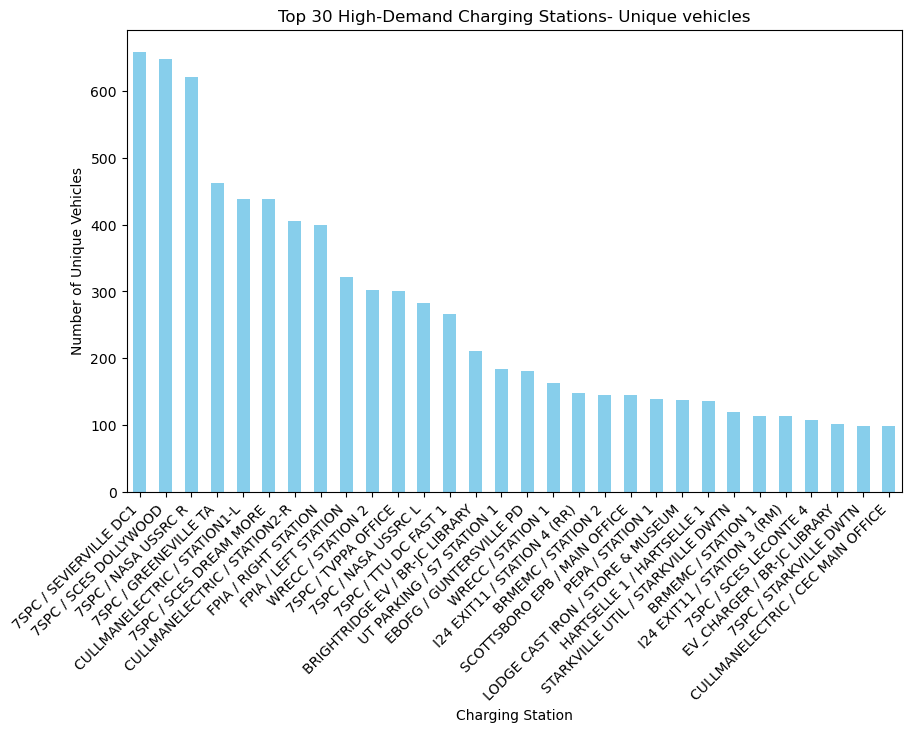

In [28]:
# Assuming 'unique_vehicles_per_station' is the Series you obtained
top_30_stations_unique = unique_vehicles_per_station.sort_values(ascending=False).head(30)

# Plotting
plt.figure(figsize=(10, 6))
top_30_stations_unique.plot(kind='bar', color='skyblue')
plt.title('Top 30 High-Demand Charging Stations- Unique vehicles')
plt.xlabel('Charging Station')
plt.ylabel('Number of Unique Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
top_30_stations_unique

Station Name
7SPC / SEVIERVILLE DC1               659
7SPC / SCES DOLLYWOOD                648
7SPC / NASA USSRC R                  621
7SPC / GREENEVILLE TA                463
CULLMANELECTRIC / STATION1-L         439
7SPC / SCES DREAM MORE               438
CULLMANELECTRIC / STATION2-R         406
FPIA / RIGHT STATION                 400
FPIA / LEFT STATION                  322
WRECC / STATION 2                    302
7SPC / TVPPA OFFICE                  301
7SPC / NASA USSRC L                  283
7SPC / TTU DC FAST 1                 266
BRIGHTRIDGE EV / BR-JC LIBRARY       210
UT PARKING / S7 STATION 1            183
EBOFG / GUNTERSVILLE PD              181
WRECC / STATION 1                    163
I24 EXIT11 / STATION 4 (RR)          148
BRMEMC / STATION 2                   145
SCOTTSBORO EPB / MAIN OFFICE         144
PEPA / STATION 1                     138
LODGE CAST IRON / STORE & MUSEUM     137
HARTSELLE 1 / HARTSELLE 1            136
STARKVILLE UTIL / STARKVILLE DWTN    119
BRM

#  count all charging sessions, including multiple sessions by the same user

In [1]:
vehicles_per_station_all = df.groupby('Station Name')['User ID'].count()

NameError: name 'df' is not defined

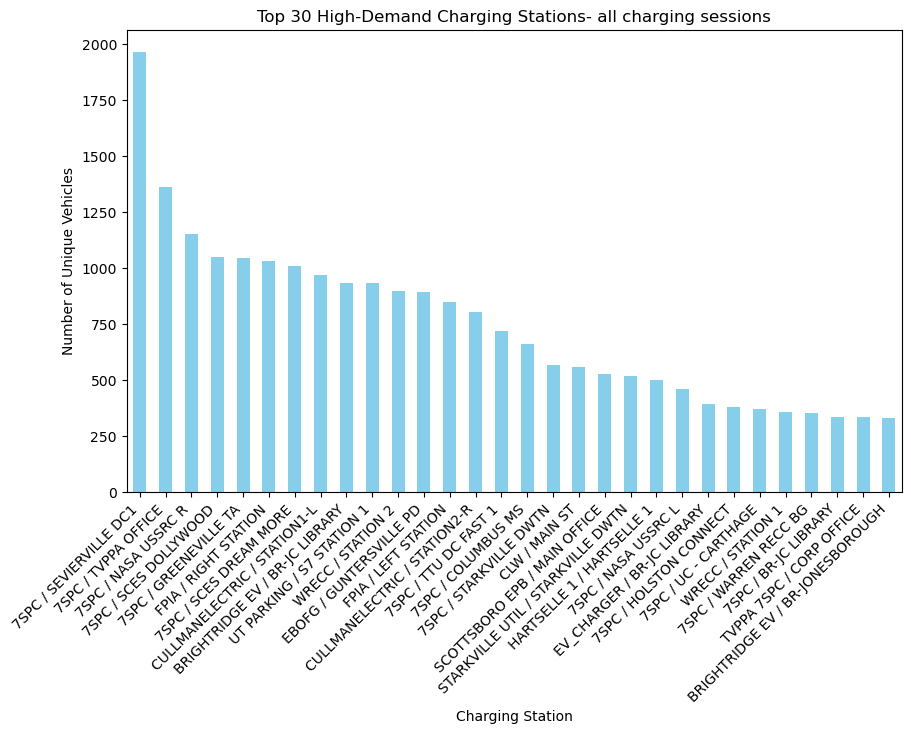

In [33]:
top_30_stations_all = vehicles_per_station_all.sort_values(ascending=False).head(30)

# Plotting
plt.figure(figsize=(10, 6))
top_30_stations_all.plot(kind='bar', color='skyblue')
plt.title('Top 30 High-Demand Charging Stations- all charging sessions')
plt.xlabel('Charging Station')
plt.ylabel('Number of Unique Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
top_30_stations_all

Station Name
7SPC / SEVIERVILLE DC1               1964
7SPC / TVPPA OFFICE                  1363
7SPC / NASA USSRC R                  1151
7SPC / SCES DOLLYWOOD                1051
7SPC / GREENEVILLE TA                1043
FPIA / RIGHT STATION                 1031
7SPC / SCES DREAM MORE               1008
CULLMANELECTRIC / STATION1-L          969
BRIGHTRIDGE EV / BR-JC LIBRARY        935
UT PARKING / S7 STATION 1             934
WRECC / STATION 2                     897
EBOFG / GUNTERSVILLE PD               893
FPIA / LEFT STATION                   850
CULLMANELECTRIC / STATION2-R          802
7SPC / TTU DC FAST 1                  721
7SPC / COLUMBUS MS                    662
7SPC / STARKVILLE DWTN                569
CLW / MAIN ST                         557
SCOTTSBORO EPB / MAIN OFFICE          526
STARKVILLE UTIL / STARKVILLE DWTN     517
HARTSELLE 1 / HARTSELLE 1             502
7SPC / NASA USSRC L                   458
EV_CHARGER / BR-JC LIBRARY            394
7SPC / HOLSTON CONNEC

In [36]:
vehicles_per_station_all.sort_values(ascending=False).head(30)

Station Name
7SPC / SEVIERVILLE DC1               1964
7SPC / TVPPA OFFICE                  1363
7SPC / NASA USSRC R                  1151
7SPC / SCES DOLLYWOOD                1051
7SPC / GREENEVILLE TA                1043
FPIA / RIGHT STATION                 1031
7SPC / SCES DREAM MORE               1008
CULLMANELECTRIC / STATION1-L          969
BRIGHTRIDGE EV / BR-JC LIBRARY        935
UT PARKING / S7 STATION 1             934
WRECC / STATION 2                     897
EBOFG / GUNTERSVILLE PD               893
FPIA / LEFT STATION                   850
CULLMANELECTRIC / STATION2-R          802
7SPC / TTU DC FAST 1                  721
7SPC / COLUMBUS MS                    662
7SPC / STARKVILLE DWTN                569
CLW / MAIN ST                         557
SCOTTSBORO EPB / MAIN OFFICE          526
STARKVILLE UTIL / STARKVILLE DWTN     517
HARTSELLE 1 / HARTSELLE 1             502
7SPC / NASA USSRC L                   458
EV_CHARGER / BR-JC LIBRARY            394
7SPC / HOLSTON CONNEC

C:\Users\mehdi\AppData\Local\Temp\ipykernel_32988\2161976875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_station['Start_Time_EST'] = pd.to_datetime(df_station['Start_Time_EST'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_32988\2161976875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_station['End_Time_EST'] = pd.to_datetime(df_station['End_Time_EST'])


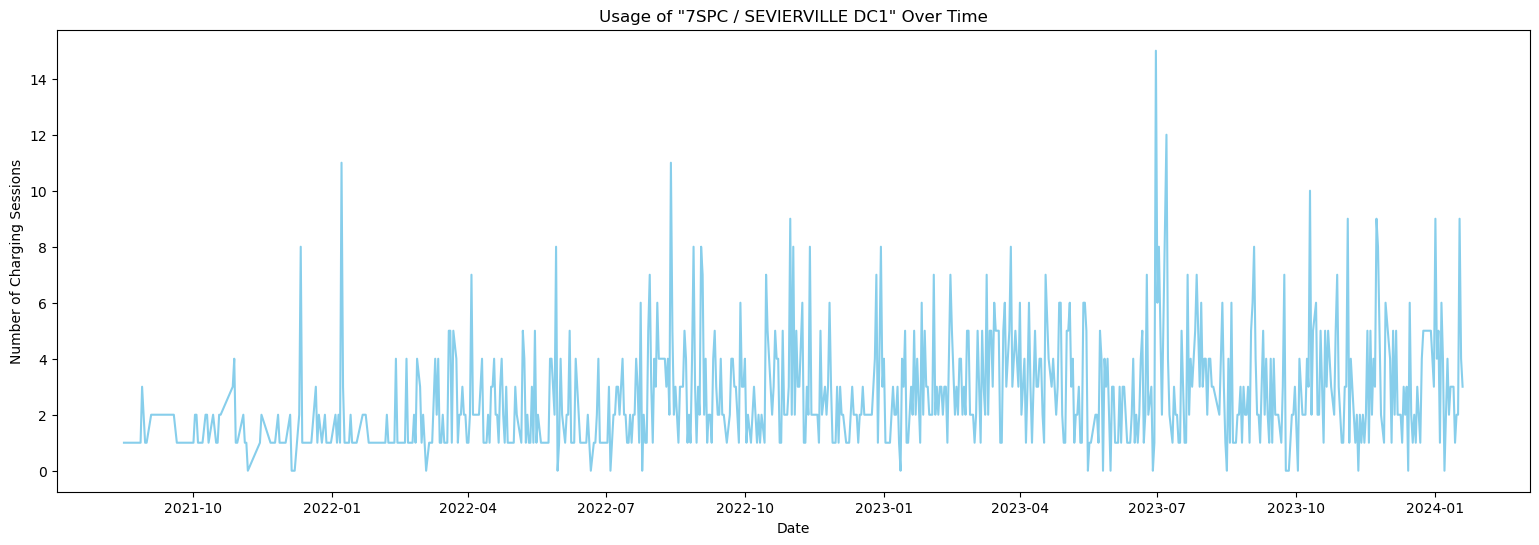

In [37]:
df_station = df_ml[df_ml['Station Name'] == "7SPC / SEVIERVILLE DC1"]

# Convert 'Start Date' and 'End Date' to datetime if they are not already
df_station['Start_Time_EST'] = pd.to_datetime(df_station['Start_Time_EST'])
df_station['End_Time_EST'] = pd.to_datetime(df_station['End_Time_EST'])

# Plotting
plt.figure(figsize=(19, 6))
df_station.groupby(df_station['Start_Time_EST'].dt.date).count()['User ID'].plot(kind='line', color='skyblue')
plt.title('Usage of "7SPC / SEVIERVILLE DC1" Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Charging Sessions')
plt.show()

C:\Users\mehdi\AppData\Local\Temp\ipykernel_32988\277434560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_station['Start_Time_EST'] = pd.to_datetime(df_station['Start_Time_EST'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_32988\277434560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_station['Energy (kWh)'] = pd.to_numeric(df_station['Energy (kWh)'], errors='coerce').fillna(0)


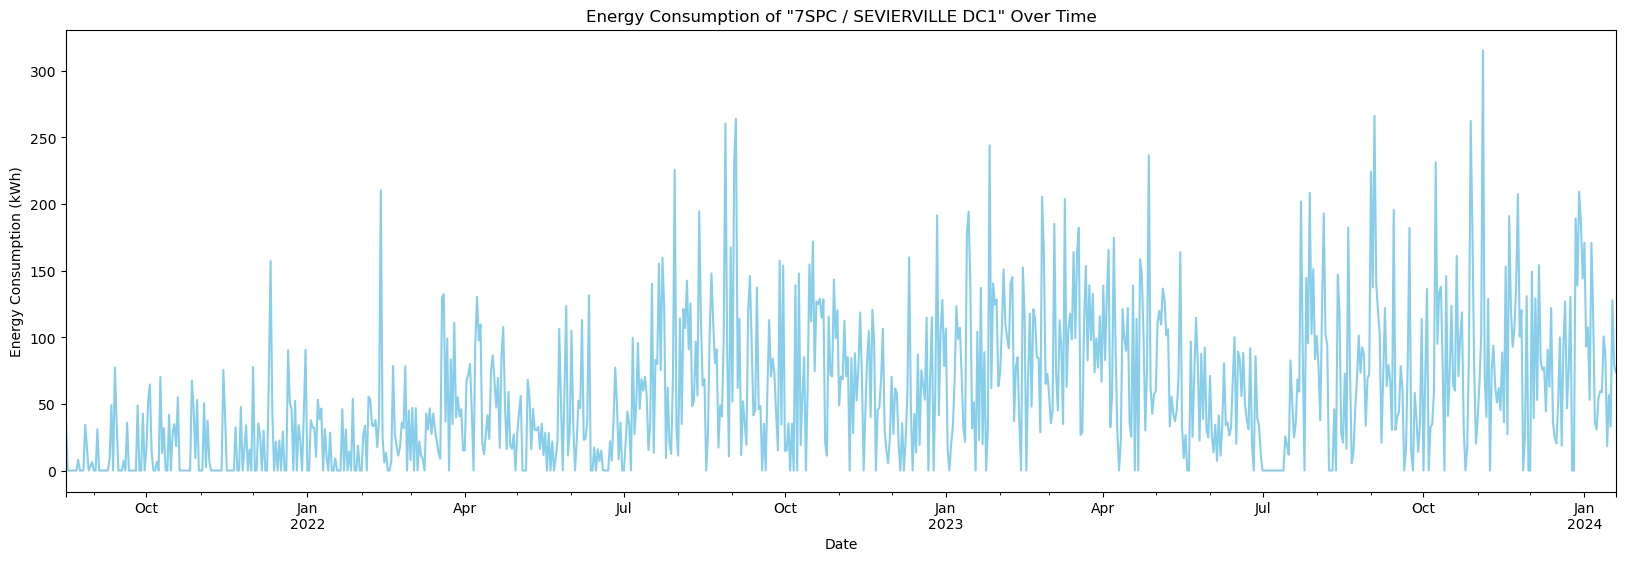

In [38]:

# Convert 'Start_Time_EST' to datetime if it's not already
df_station['Start_Time_EST'] = pd.to_datetime(df_station['Start_Time_EST'])

# Convert 'Energy (kWh)' to numeric if it's not already, and fill NaNs with 0
df_station['Energy (kWh)'] = pd.to_numeric(df_station['Energy (kWh)'], errors='coerce').fillna(0)

# Plotting
plt.figure(figsize=(20, 6))
df_station.set_index('Start_Time_EST').resample('D')['Energy (kWh)'].sum().plot(kind='line', color='skyblue')
plt.title('Energy Consumption of "7SPC / SEVIERVILLE DC1" Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

In [ ]:
# Sort df_station based on 'Start_Time_EST'
#df_station_sorted = df_station.sort_values('Start_Time_EST')



land characteristics, land-use

socio-demographic properties

impact of realtime traffic flows

----> traffic flow estimates for next 5 years

Peak and Non-peak Hours

weekdays or weekend 

ANN, RNN, LSTM, GRU, SAEs and Bi-LSTM .....

LSTM model is superior to the other methods

stacked LSTM, where multiple layers of LSTM are stacked on top of each other.



In [ ]:
df_ml